1、torch.utils.data.DataLoader，用来处理多个样本

2、torch.utils.data.Dataset，用来处理单个样本

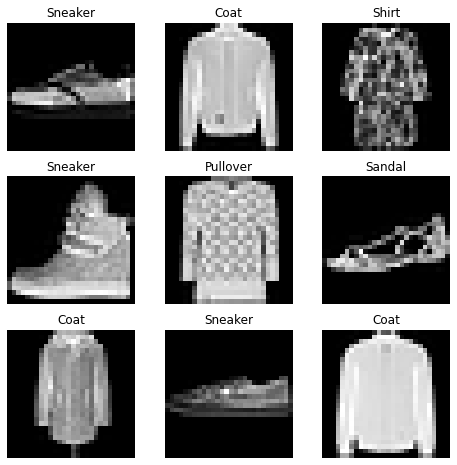

In [6]:
#针对于torch内置的数据库而言，利用torchvision加载内置的数据集
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
training_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)
#可视化，x为图片，y为类别
labels_map={
    0:"T-Shirt",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot"
}
figure=plt.figure(figsize=(8,8))
cols,rows=3,3
for i in range(1,cols * rows + 1):
    sample_idx=torch.randint(len(training_data),size=(1,)).item()
    img,label=training_data[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(),cmap="gray")
plt.show()

3、构建自定义的Dataset

必须实现3个函数：_init_、_len_、_getitem_

In [10]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    #需要传入磁盘或文件路径
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None): #transform和target_transform是分别对特征或标签进行预处理和后处理的函数
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    #返回数据库大小
    def __len__(self):
        return len(self.img_labels)
    
    #基于一个索引，返回一个训练样本，这个训练样本是由x，y构成的训练对
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

4、一批DataLoader

In [ ]:
#可能会涉及到多进程加载数据
#导入DataLoader          ###查看其用法：命令行vim dataloader.py   定位：class DataLoader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True) #shuffle对数据进行打乱
test_dataloader = DataLoader(test_data, batch_size=64)

In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

5、Dataset Type

map-style datasets（常用）、iterable-style datasets（更适用于流式计算场景）